In [185]:
import pandas as pd
import matplotlib.pyplot as plt

In [186]:
color_palette = {
    'region': ['region_berner-mitelland', 'region_berner-oberland', 'region_freiburg-neuenburg-jura', 'region_graubuenden', 'region_nordwestschweiz', 'region_ostschweiz', 'region_tessin', 'region_waadt-genfersee', 'region_wallis', 'region_zentralschweiz', 'region_zuerich'],
    'color': ['#6CA1AF', '#EBD2B4', '#CE8389' , '#C07869', '#BE6E83', '#E67F76', '#F2B981', '#9B7E78', '#79A89D', '#ADA08C', '#8EA279']
}


# Daten camping.ch
### Import

In [187]:
df_camping = pd.read_csv('campingspider/camping.csv', encoding='utf-8')
df_camping.head()

,url,name,locality,website,star category,activities,tourist pitches,open (seasons 1),open (seasons 2),open (seasons 3),...,laundry dryer / tumble dryer,hiking,lake with sandy beach,lake with stony beach,river,train station,bus,VSC membership,TCS membership,SCCV membership
0,https://camping.ch/de/campingplatz/tessin/meri...,Camping Monte San Giorgio,6866 Meride (TI),NaN,4,8,64.0,19.04.2024 − 29.09.2024,NaN,NaN,...,0,1,0,0,1,0,1,1,1,0
1,https://camping.ch/de/campingplatz/wallis/fies...,Eggishorn,3984 Fiesch (VS),NaN,4,6,127.0,01.01.2024 − 31.12.2024,NaN,NaN,...,0,1,0,0,1,1,1,1,0,0
2,https://camping.ch/de/campingplatz/wallis/les-...,La Médettaz,1923 Les Marécottes (VS),NaN,2,5,30.0,01.05.2024 − 30.09.2024,NaN,NaN,...,1,1,0,0,0,1,1,0,0,0
3,https://camping.ch/de/campingplatz/berner-ober...,Gadmen,3863 Gadmen (BE),NaN,2,11,50.0,01.05.2024 − 31.10.2024,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0
4,https://camping.ch/de/campingplatz/tessin/mont...,Bosco della Bella,6998 Monteggio (TI),NaN,0,2,NaN,01.01.2024 − 31.12.2024,NaN,NaN,...,0,0,0,0,1,0,0,0,0,0


### Ersetzen von falschen Werten

In [188]:
# Folgende drei Saisondaten waren mit null Tagen hinterlegt und wurden deshalb manuell nachgeschaut. Die restlichen Saisondaten wurden nicht nachgeprüft.
corrections_date = {
    'Camping Bellavista': '12.04.2024 - 13.10.2024',
    'Camping Schaffhausen - Freizeitanlage Rheinwiese': '27.03.2024 - 20.10.2024',
    'Nufenenpark': '01.06.2024 - 30.09.2024'
}

# Funktion zur Korrektur der Datumsangaben
def correct_dates(row):
    if row['name'] in corrections_date:
        return corrections_date[row['name']]
    return row['open (seasons 1)']

# Datumsangaben im DataFrame korrigieren
df_camping['open (seasons 1)'] = df_camping.apply(correct_dates, axis=1)

In [189]:
# Es wurden die Campingplätze mit Anzahl Touristenplätze < 10 und 'nan' geprüft.
# Quelle: Internetseite der Campingplätze.
corrections_pitches = {
    'https://camping.ch/de/campingplatz/ostschweiz/weesen/camping-gaesi?l=true': 70,
    'https://camping.ch/de/campingplatz/waadt-genfersee/forel/camping-de-forel?l=true': 43,
    'https://camping.ch/de/campingplatz/ostschweiz/Altst%25C3%25A4tten/allmend_rheintal?l=true': 150,
    'https://camping.ch/de/campingplatz/wallis/ritzingen/camping-brigga?l=true': 127,
    'https://camping.ch/de/campingplatz/ostschweiz/mammern/seewiese?l=true': 95,
    'https://camping.ch/de/campingplatz/zentralschweiz/seelisberg/naturcamping_seelisberg?l=true': 60,
    'https://camping.ch/de/campingplatz/tessin/monteggio/boscodellabella?l=true': 10,
    'https://camping.ch/de/campingplatz/freiburg-neuenburg-jura/le-noirmont/camping-du-creux-des-biches?l=true': 40,
    'https://camping.ch/de/campingplatz/zentralschweiz/sisikon/camping_bucheli?l=true': 50,
    'https://camping.ch/de/campingplatz/wallis/sembrancher/la-prairie?l=true': 48,
    'https://camping.ch/de/campingplatz/berner-mitelland/rueschegg-heubach/camping-rueschegg-heubach?l=true': 20,
    'https://camping.ch/de/campingplatz/zentralschweiz/morgarten/camping_neselen?l=true': 40,
    'https://camping.ch/de/campingplatz/berner-oberland/boenigen/seeruhe?l=true': 88,
    'https://camping.ch/de/campingplatz/ostschweiz/stein-a-rhein/grenzstein?l=true': 64,
    'https://camping.ch/de/campingplatz/berner-oberland/saanen/beim-kappeli?l=true': 27,
    'https://camping.ch/de/campingplatz/freiburg-neuenburg-jura/rebeuvilier/du-raimeux?l=true': 31,
    'https://camping.ch/de/campingplatz/berner-oberland/gsteig-b-gstaad/bergcamping-gsteig?l=true': 16,
    'https://camping.ch/de/campingplatz/berner-oberland/schwenden-im-diemtigtal/camping-eggmatte-diemtigtal?l=true': 16,
    'https://camping.ch/de/campingplatz/freiburg-neuenburg-jura/le-landeron/bellerive-le-landeron?l=true': 50,
}

# Funktion zur Korrektur der Datumsangaben
def correct_dates(row):
    if row['url'] in corrections_pitches:
        return corrections_pitches[row['url']]
    return row['tourist pitches']

# Datumsangaben im DataFrame korrigieren
df_camping['tourist pitches'] = df_camping.apply(correct_dates, axis=1)

### Berechnung prozentuale Öffnungszeiten
Tage Jahr: 365 (Vereinfachung)

In [190]:
from datetime import datetime
# Tage von Öffnung bis Schliessung der Saison
def process_column_value(value):
    # leere Zellen:
    if pd.isna(value) or value == "":
        return 0
    try:
        # wenn ein Text vor dem Datum steht, sollen die Zeichen nach dem Doppelpunkt für das Datum verwendet werden
        if ':' in value:
            middle_value = value[value.find(':') + 2: value.find(':') + 12].strip()
            open_date = datetime.strptime(middle_value, '%d.%m.%Y')
            end_date = datetime.strptime(value[-10:].strip(), '%d.%m.%Y')
            return  (end_date - open_date).days
        end_date = datetime.strptime(value[-10:].strip(), '%d.%m.%Y')
        open_date = datetime.strptime(value[:10].strip(), '%d.%m.%Y')
        return (end_date - open_date).days
    except:
        print(f"Fehler bei der Verarbeitung von Wert {value}")
        return 0

# für alle Saison die Tage berechnen (falls mehrere) und zusammenzählen
def calculate_row(row):
    columns = ['open (seasons 1)', 'open (seasons 2)', 'open (seasons 3)', 'open (seasons 4)', 'open (seasons 5)', 'open (seasons 6)', 'open (seasons 7)']
    total = 0
    for col in columns:
        total += process_column_value(row[col])
    return total

# Neue Spalte mit Tagen erstellen, indem die Berechnung auf jede Zeile angewandt wird
df_camping['open[day]'] = df_camping.apply(calculate_row, axis=1)

In [191]:
# prozentualer Anteil der offenen Tage am Gesamtjahr
df_camping['open[%]'] = df_camping['open[day]'].apply(lambda x: round(x / 365,2) if x <= 365 else 365/365)

In [192]:
df_camping

,url,name,locality,website,star category,activities,tourist pitches,open (seasons 1),open (seasons 2),open (seasons 3),...,lake with sandy beach,lake with stony beach,river,train station,bus,VSC membership,TCS membership,SCCV membership,open[day],open[%]
0,https://camping.ch/de/campingplatz/tessin/meri...,Camping Monte San Giorgio,6866 Meride (TI),NaN,4,8,64.0,19.04.2024 − 29.09.2024,NaN,NaN,...,0,0,1,0,1,1,1,0,163,0.45
1,https://camping.ch/de/campingplatz/wallis/fies...,Eggishorn,3984 Fiesch (VS),NaN,4,6,127.0,01.01.2024 − 31.12.2024,NaN,NaN,...,0,0,1,1,1,1,0,0,365,1.00
2,https://camping.ch/de/campingplatz/wallis/les-...,La Médettaz,1923 Les Marécottes (VS),NaN,2,5,30.0,01.05.2024 − 30.09.2024,NaN,NaN,...,0,0,0,1,1,0,0,0,152,0.42
3,https://camping.ch/de/campingplatz/berner-ober...,Gadmen,3863 Gadmen (BE),NaN,2,11,50.0,01.05.2024 − 31.10.2024,NaN,NaN,...,0,0,0,0,0,1,0,0,183,0.50
4,https://camping.ch/de/campingplatz/tessin/mont...,Bosco della Bella,6998 Monteggio (TI),NaN,0,2,10.0,01.01.2024 − 31.12.2024,NaN,NaN,...,0,0,1,0,0,0,0,0,365,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,https://camping.ch/de/campingplatz/graubuenden...,Camping Rania,7432 Zillis (GR),NaN,3,6,35.0,01.01.2024 − 31.12.2024,NaN,NaN,...,0,0,1,0,1,0,0,0,365,1.00
373,https://camping.ch/de/campingplatz/wallis/sust...,Camping Monument,3952 Susten (VS),www.campingmonument.ch,3,6,170.0,01.05.2024 − 24.09.2024,NaN,NaN,...,0,0,1,1,1,0,0,0,146,0.40
374,https://camping.ch/de/campingplatz/waadt-genfe...,Bois-du-Fey,1430 Orges (VD),NaN,2,6,12.0,01.03.2024 − 31.10.2024,NaN,NaN,...,0,0,0,1,0,0,0,1,244,0.67
375,https://camping.ch/de/campingplatz/nordwestsch...,Campingplatz Talhaus,4416 Bubendorf (BL),NaN,0,4,10.0,01.01.2024 − 31.12.2024,NaN,NaN,...,0,0,1,1,0,0,0,0,365,1.00


## Region extrahieren aus 'url'

In [193]:
# Funktion zum Extrahieren der Region aus der URL
def extract_region(url):
    parts = url.split('/')
    if len(parts) > 5:
        return parts[5]  # Das Wort nach dem fünften '/' in der URL
    else:
        return None

# Neue Spalte 'region' erstellen
df_camping['region'] = df_camping['url'].apply(extract_region)

df_camping

,url,name,locality,website,star category,activities,tourist pitches,open (seasons 1),open (seasons 2),open (seasons 3),...,lake with stony beach,river,train station,bus,VSC membership,TCS membership,SCCV membership,open[day],open[%],region
0,https://camping.ch/de/campingplatz/tessin/meri...,Camping Monte San Giorgio,6866 Meride (TI),NaN,4,8,64.0,19.04.2024 − 29.09.2024,NaN,NaN,...,0,1,0,1,1,1,0,163,0.45,tessin
1,https://camping.ch/de/campingplatz/wallis/fies...,Eggishorn,3984 Fiesch (VS),NaN,4,6,127.0,01.01.2024 − 31.12.2024,NaN,NaN,...,0,1,1,1,1,0,0,365,1.00,wallis
2,https://camping.ch/de/campingplatz/wallis/les-...,La Médettaz,1923 Les Marécottes (VS),NaN,2,5,30.0,01.05.2024 − 30.09.2024,NaN,NaN,...,0,0,1,1,0,0,0,152,0.42,wallis
3,https://camping.ch/de/campingplatz/berner-ober...,Gadmen,3863 Gadmen (BE),NaN,2,11,50.0,01.05.2024 − 31.10.2024,NaN,NaN,...,0,0,0,0,1,0,0,183,0.50,berner-oberland
4,https://camping.ch/de/campingplatz/tessin/mont...,Bosco della Bella,6998 Monteggio (TI),NaN,0,2,10.0,01.01.2024 − 31.12.2024,NaN,NaN,...,0,1,0,0,0,0,0,365,1.00,tessin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,https://camping.ch/de/campingplatz/graubuenden...,Camping Rania,7432 Zillis (GR),NaN,3,6,35.0,01.01.2024 − 31.12.2024,NaN,NaN,...,0,1,0,1,0,0,0,365,1.00,graubuenden
373,https://camping.ch/de/campingplatz/wallis/sust...,Camping Monument,3952 Susten (VS),www.campingmonument.ch,3,6,170.0,01.05.2024 − 24.09.2024,NaN,NaN,...,0,1,1,1,0,0,0,146,0.40,wallis
374,https://camping.ch/de/campingplatz/waadt-genfe...,Bois-du-Fey,1430 Orges (VD),NaN,2,6,12.0,01.03.2024 − 31.10.2024,NaN,NaN,...,0,0,1,0,0,0,1,244,0.67,waadt-genfersee
375,https://camping.ch/de/campingplatz/nordwestsch...,Campingplatz Talhaus,4416 Bubendorf (BL),NaN,0,4,10.0,01.01.2024 − 31.12.2024,NaN,NaN,...,0,1,1,0,0,0,0,365,1.00,nordwestschweiz


In [194]:
# One hot Encoding
df_region_encoded = pd.get_dummies(df_camping['region'], prefix='region')

# Umwandlung von boolschen Werten in numerische Werte (0 und 1)
df_region_encoded = df_region_encoded.astype(int)
df_region_encoded

,region_berner-mitelland,region_berner-oberland,region_freiburg-neuenburg-jura,region_graubuenden,region_grenznah,region_nordwestschweiz,region_ostschweiz,region_tessin,region_waadt-genfersee,region_wallis,region_zentralschweiz,region_zuerich
0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
372,0,0,0,1,0,0,0,0,0,0,0,0
373,0,0,0,0,0,0,0,0,0,1,0,0
374,0,0,0,0,0,0,0,0,1,0,0,0
375,0,0,0,0,0,1,0,0,0,0,0,0


In [195]:
# die Spalten ausschliessen, welchen nicht in der Schweiz sind
df_region_encoded = df_region_encoded.drop(['region_grenznah'], axis=1)

In [196]:
df_region_encoded.shape[1]

11

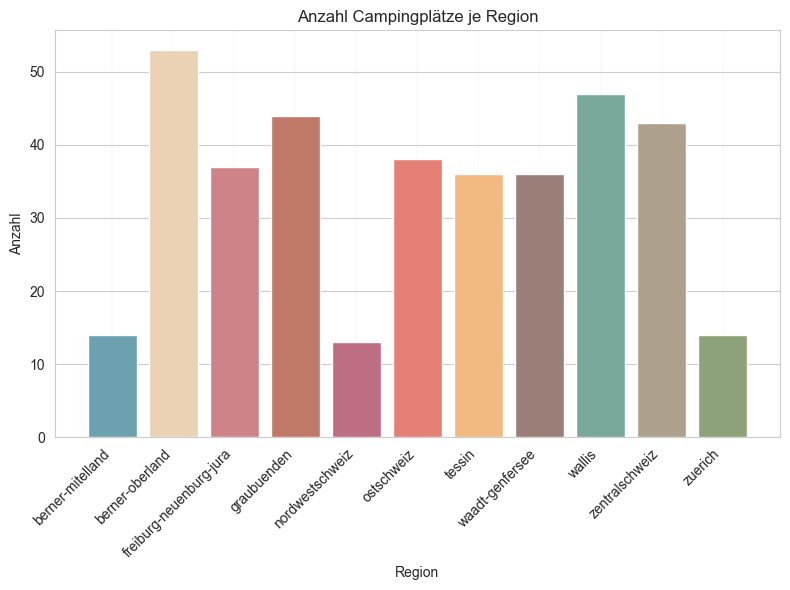

In [197]:
# Gestapeltes Säulendiagramm erstellen
fig, ax = plt.subplots(figsize=(8, 6))

# Anzahl der Zeilen im DataFrame
num_rows = len(df_region_encoded)

# Schleife über jede Spalte im DataFrame
for i, col in enumerate(df_region_encoded.columns):
    values = df_region_encoded[col].values
    region = col.lower()

    # Farbe abrufen
    if region in color_palette['region']:
        color = color_palette['color'][color_palette['region'].index(region)]
    else:
        color = '#CCCCCC'

    # Höhe der Säule
    ax.bar(i, sum(values), color=color)

# Achsenbeschriftungen und Titel hinzufügen
ax.set_ylabel('Anzahl')
ax.set_xlabel('Region')
ax.set_title('Anzahl Campingplätze je Region')

xticklabels = [col[7:] for col in df_region_encoded.columns]
ax.set_xticks(range(len(df_region_encoded.columns)))
ax.set_xticklabels(xticklabels, rotation=45, ha='right')

# Vertikale Hilfslinien ausschalten
ax.grid(which='major', axis='x', linestyle='-', linewidth=0.1, color='lightgray')  # Nur horizontale Linien behalten

plt.tight_layout()
plt.show()

### Region in Gesamt-DF intgrieren

In [198]:
df_camping = pd.concat([df_camping, df_region_encoded], axis=1)

In [199]:
df_camping

,url,name,locality,website,star category,activities,tourist pitches,open (seasons 1),open (seasons 2),open (seasons 3),...,region_berner-oberland,region_freiburg-neuenburg-jura,region_graubuenden,region_nordwestschweiz,region_ostschweiz,region_tessin,region_waadt-genfersee,region_wallis,region_zentralschweiz,region_zuerich
0,https://camping.ch/de/campingplatz/tessin/meri...,Camping Monte San Giorgio,6866 Meride (TI),NaN,4,8,64.0,19.04.2024 − 29.09.2024,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0
1,https://camping.ch/de/campingplatz/wallis/fies...,Eggishorn,3984 Fiesch (VS),NaN,4,6,127.0,01.01.2024 − 31.12.2024,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0
2,https://camping.ch/de/campingplatz/wallis/les-...,La Médettaz,1923 Les Marécottes (VS),NaN,2,5,30.0,01.05.2024 − 30.09.2024,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0
3,https://camping.ch/de/campingplatz/berner-ober...,Gadmen,3863 Gadmen (BE),NaN,2,11,50.0,01.05.2024 − 31.10.2024,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
4,https://camping.ch/de/campingplatz/tessin/mont...,Bosco della Bella,6998 Monteggio (TI),NaN,0,2,10.0,01.01.2024 − 31.12.2024,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,https://camping.ch/de/campingplatz/graubuenden...,Camping Rania,7432 Zillis (GR),NaN,3,6,35.0,01.01.2024 − 31.12.2024,NaN,NaN,...,0,0,1,0,0,0,0,0,0,0
373,https://camping.ch/de/campingplatz/wallis/sust...,Camping Monument,3952 Susten (VS),www.campingmonument.ch,3,6,170.0,01.05.2024 − 24.09.2024,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0
374,https://camping.ch/de/campingplatz/waadt-genfe...,Bois-du-Fey,1430 Orges (VD),NaN,2,6,12.0,01.03.2024 − 31.10.2024,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
375,https://camping.ch/de/campingplatz/nordwestsch...,Campingplatz Talhaus,4416 Bubendorf (BL),NaN,0,4,10.0,01.01.2024 − 31.12.2024,NaN,NaN,...,0,0,0,1,0,0,0,0,0,0


In [200]:
df_camping.dtypes

url                       object
name                      object
locality                  object
website                   object
star category              int64
                           ...  
region_tessin              int32
region_waadt-genfersee     int32
region_wallis              int32
region_zentralschweiz      int32
region_zuerich             int32
Length: 62, dtype: object

# Manuelle Daten (Preis)
## Import

In [201]:
df_price = pd.read_csv('rohdaten_preis.csv', encoding='utf-8', sep=';')
df_price

,url,Preisseite,Latitude,Longitude,pitch at the waterfront,other accommodation,small pitch (<80 m2),medium pitch (~100 m2),large pitch (>110 m2),main season,low season,total_price
0,https://camping.ch/de/campingplatz/graubuenden...,https://camping-lenzerheide.ch/de/camping-grav...,46.722760,9.555440,0.0,1.0,1,0,0,1,0,38.0
1,https://camping.ch/de/campingplatz/graubuenden...,https://camping-lenzerheide.ch/de/camping-grav...,46.722760,9.555440,0.0,1.0,0,1,0,1,0,43.0
2,https://camping.ch/de/campingplatz/graubuenden...,https://camping-lenzerheide.ch/de/camping-grav...,46.722760,9.555440,0.0,1.0,1,0,0,0,1,40.0
3,https://camping.ch/de/campingplatz/graubuenden...,https://camping-lenzerheide.ch/de/camping-grav...,46.722760,9.555440,0.0,1.0,0,1,0,0,1,45.0
4,https://camping.ch/de/campingplatz/graubuenden...,https://camping-lenzerheide.ch/de/camping-st-c...,46.698692,9.558404,0.0,1.0,1,0,0,1,0,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...
821,https://camping.ch/de/campingplatz/berner-mite...,https://www.camping-lindenhof.ch/de/tarife-inf...,47.093373,7.210469,0.0,0.0,1,0,0,1,1,31.2
822,https://camping.ch/de/campingplatz/berner-mite...,https://www.camping-lindenhof.ch/de/tarife-inf...,47.093373,7.210469,0.0,0.0,0,1,0,1,1,37.2
823,https://camping.ch/de/campingplatz/berner-mite...,https://seeland-camp.ch/preise/,47.162189,7.346157,0.0,0.0,1,0,0,0,1,26.7
824,https://camping.ch/de/campingplatz/berner-mite...,https://seeland-camp.ch/preise/,47.162189,7.346157,0.0,0.0,1,0,0,1,0,28.7


### Leere Zeilen löschen

In [202]:
len(df_price)

826

In [203]:
# alle Zeilen, welche keinen Preis hinterlegt haben, werden gelöscht
df_price = df_price[df_price['total_price'] != 0]

In [204]:
len(df_price)

806

## Format prüfen

In [205]:
df_price.dtypes

url                         object
Preisseite                  object
Latitude                   float64
Longitude                  float64
pitch at the waterfront    float64
other accommodation        float64
small pitch (<80 m2)         int64
medium pitch  (~100 m2)      int64
large pitch  (>110 m2)       int64
main season                  int64
low season                   int64
total_price                float64
dtype: object

In [206]:
df_price['pitch at the waterfront'] = df_price['pitch at the waterfront'].astype(int)
df_price['other accommodation'] = df_price['other accommodation'].astype(int)
df_price.dtypes

C:\Users\sarak\AppData\Local\Temp\ipykernel_5028\2070273988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price['pitch at the waterfront'] = df_price['pitch at the waterfront'].astype(int)
C:\Users\sarak\AppData\Local\Temp\ipykernel_5028\2070273988.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price['other accommodation'] = df_price['other accommodation'].astype(int)


url                         object
Preisseite                  object
Latitude                   float64
Longitude                  float64
pitch at the waterfront      int32
other accommodation          int32
small pitch (<80 m2)         int64
medium pitch  (~100 m2)      int64
large pitch  (>110 m2)       int64
main season                  int64
low season                   int64
total_price                float64
dtype: object

# Zusammenführen der Tabellen

In [207]:
# Basisliste ist manuell erstellte Liste (df_price)
df_camping_all  = pd.merge(df_price, df_camping, on='url', how='left')

In [208]:
df_camping_all

,url,Preisseite,Latitude,Longitude,pitch at the waterfront,other accommodation,small pitch (<80 m2),medium pitch (~100 m2),large pitch (>110 m2),main season,...,region_berner-oberland,region_freiburg-neuenburg-jura,region_graubuenden,region_nordwestschweiz,region_ostschweiz,region_tessin,region_waadt-genfersee,region_wallis,region_zentralschweiz,region_zuerich
0,https://camping.ch/de/campingplatz/graubuenden...,https://camping-lenzerheide.ch/de/camping-grav...,46.722760,9.555440,0,1,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,https://camping.ch/de/campingplatz/graubuenden...,https://camping-lenzerheide.ch/de/camping-grav...,46.722760,9.555440,0,1,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
2,https://camping.ch/de/campingplatz/graubuenden...,https://camping-lenzerheide.ch/de/camping-grav...,46.722760,9.555440,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,https://camping.ch/de/campingplatz/graubuenden...,https://camping-lenzerheide.ch/de/camping-grav...,46.722760,9.555440,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,https://camping.ch/de/campingplatz/graubuenden...,https://camping-lenzerheide.ch/de/camping-st-c...,46.698692,9.558404,0,1,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,https://camping.ch/de/campingplatz/berner-mite...,https://www.camping-lindenhof.ch/de/tarife-inf...,47.093373,7.210469,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
802,https://camping.ch/de/campingplatz/berner-mite...,https://www.camping-lindenhof.ch/de/tarife-inf...,47.093373,7.210469,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
803,https://camping.ch/de/campingplatz/berner-mite...,https://seeland-camp.ch/preise/,47.162189,7.346157,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
804,https://camping.ch/de/campingplatz/berner-mite...,https://seeland-camp.ch/preise/,47.162189,7.346157,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [209]:
len(df_camping_all)

806

In [211]:
# Bearbeitete Daten als CSV speichern
df_camping_all.to_csv('df_camping_all.csv', encoding='utf-8', index=False)

In [212]:
df_camping_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806 entries, 0 to 805
Data columns (total 73 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   url                              806 non-null    object 
 1   Preisseite                       806 non-null    object 
 2   Latitude                         806 non-null    float64
 3   Longitude                        806 non-null    float64
 4   pitch at the waterfront          806 non-null    int32  
 5   other accommodation              806 non-null    int32  
 6   small pitch (<80 m2)             806 non-null    int64  
 7   medium pitch  (~100 m2)          806 non-null    int64  
 8   large pitch  (>110 m2)           806 non-null    int64  
 9   main season                      806 non-null    int64  
 10  low season                       806 non-null    int64  
 11  total_price                      806 non-null    float64
 12  name                  